# Weather Monitering System

To make future Predictions about Weather based on inputs like Temperature, AIQ and Humidity.

## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Example dataset

In [2]:
data = {
    'Temperature': [30, 35, 40, 35, 25, 25, 35, 40, 30, 25],
    'Humidity': [85, 80, 70, 75, 90, 95, 65, 70, 80, 75],
    'AirQuality': [40, 45, 30, 35, 40, 55, 45, 30, 40, 55],
    'WeatherScore': [75, 70, 85, 80, 65, 60, 90, 95, 75, 70]
}

## Weather Prediction

In [4]:
def predict_weather(data):
    df = pd.DataFrame(data)
    
    # Features and targets
    X = df.drop(columns=['Temperature', 'Humidity', 'AirQuality'])
    y_temp = df['Temperature']
    y_humid = df['Humidity']
    y_air_quality = df['AirQuality']
    
    # Split the data into training/testing sets for each target
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
    X_train_humid, X_test_humid, y_train_humid, y_test_humid = train_test_split(X, y_humid, test_size=0.2, random_state=42)
    X_train_air, X_test_air, y_train_air, y_test_air = train_test_split(X, y_air_quality, test_size=0.2, random_state=42)

    # Model Training
    model_temp = LinearRegression()
    model_temp.fit(X_train_temp, y_train_temp)
    
    model_humid = LinearRegression()
    model_humid.fit(X_train_humid, y_train_humid)
    
    model_air = LinearRegression()
    model_air.fit(X_train_air, y_train_air)
    
    # Prediction
    y_pred_temp = model_temp.predict(X_test_temp)
    y_pred_humid = model_humid.predict(X_test_humid)
    y_pred_air = model_air.predict(X_test_air)

    return [[y_pred_temp, y_pred_humid, y_pred_air], [y_test_temp, y_test_humid, y_test_air]]


## Visual Data

In [5]:
def visual_data(res):
    df = pd.DataFrame(data)
    
    # Features and targets
    X = df[['WeatherScore']]
    y_temp = df['Temperature']
    y_humid = df['Humidity']
    y_air_quality = df['AirQuality']
    
    y_pred_temp, y_pred_humid, y_pred_air = res[0] 
    y_test_temp, y_test_humid, y_test_air = res[1]
    
    # Step 4: Visualization
    plt.figure(figsize=(15, 6))

    # Temperature
    plt.subplot(1, 3, 1)
    plt.scatter(y_test_temp, y_pred_temp, color='blue', label='Predicted vs Actual')
    plt.plot([y_temp.min(), y_temp.max()], [y_temp.min(), y_temp.max()], 'k--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.title('Temperature Prediction')
    plt.legend()
    
    # Humidity
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_humid, y_pred_humid, color='blue', label='Predicted vs Actual')
    plt.plot([y_humid.min(), y_humid.max()], [y_humid.min(), y_humid.max()], 'k--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Humidity')
    plt.ylabel('Predicted Humidity')
    plt.title('Humidity Prediction')
    plt.legend()
    
    # Air Quality
    plt.subplot(1, 3, 3)
    plt.scatter(y_test_air, y_pred_air, color='blue', label='Predicted vs Actual')
    plt.plot([y_air_quality.min(), y_air_quality.max()], [y_air_quality.min(), y_air_quality.max()], 'k--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Air Quality')
    plt.ylabel('Predicted Air Quality')
    plt.title('Air Quality Prediction')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Result Printing

In [6]:
def result_print(y_pred_temp, y_pred_humid, y_pred_air):
    keys = ["Predicted Temperature:", "Predicted Humidity:", "Predicted Air Quality:"]
    print("Predicted Temperature Range:", y_pred_temp)
    print("Predicted Humidity Range:", y_pred_humid)
    print("Predicted Air Quality Range:", y_pred_air)
    
    # Loop
    o=0
    for i in res[0]:
        to_print = f'{keys[o]} {sum(i)/len(i)}'
        print(to_print)
        o=+1


## Print model performance

In [7]:
def debug(res):
    y_pred_temp, y_pred_humid, y_pred_air = res[0] 
    y_test_temp, y_test_humid, y_test_air = res[1]
    
    temp_mse = mean_squared_error(y_test_temp, y_pred_temp)
    temp_r2 = r2_score(y_test_temp, y_pred_temp)
    humid_mse = mean_squared_error(y_test_humid, y_pred_humid)
    humid_r2 = r2_score(y_test_humid, y_pred_humid)
    air_mse = mean_squared_error(y_test_air, y_pred_air)
    air_r2 = r2_score(y_test_air, y_pred_air)
    
    return [
        ('Temperature - Mean Squared Error', temp_mse),
        ('Temperature - R² Score', temp_r2),
        ('Humidity - Mean Squared Error', humid_mse),
        ('Humidity - R² Score', humid_r2),
        ('Air Quality - Mean Squared Error', air_mse),
        ('Air Quality - R² Score', air_r2)
    ]


# Testing

In [8]:
res = predict_weather(data)

In [9]:
debug(res)

[('Temperature - Mean Squared Error', 23.237315759637223),
 ('Temperature - R² Score', -2.7179705215419556),
 ('Humidity - Mean Squared Error', 7.718608276643999),
 ('Humidity - R² Score', 0.0),
 ('Air Quality - Mean Squared Error', 3.493480725623545),
 ('Air Quality - R² Score', 0.4410430839002327)]

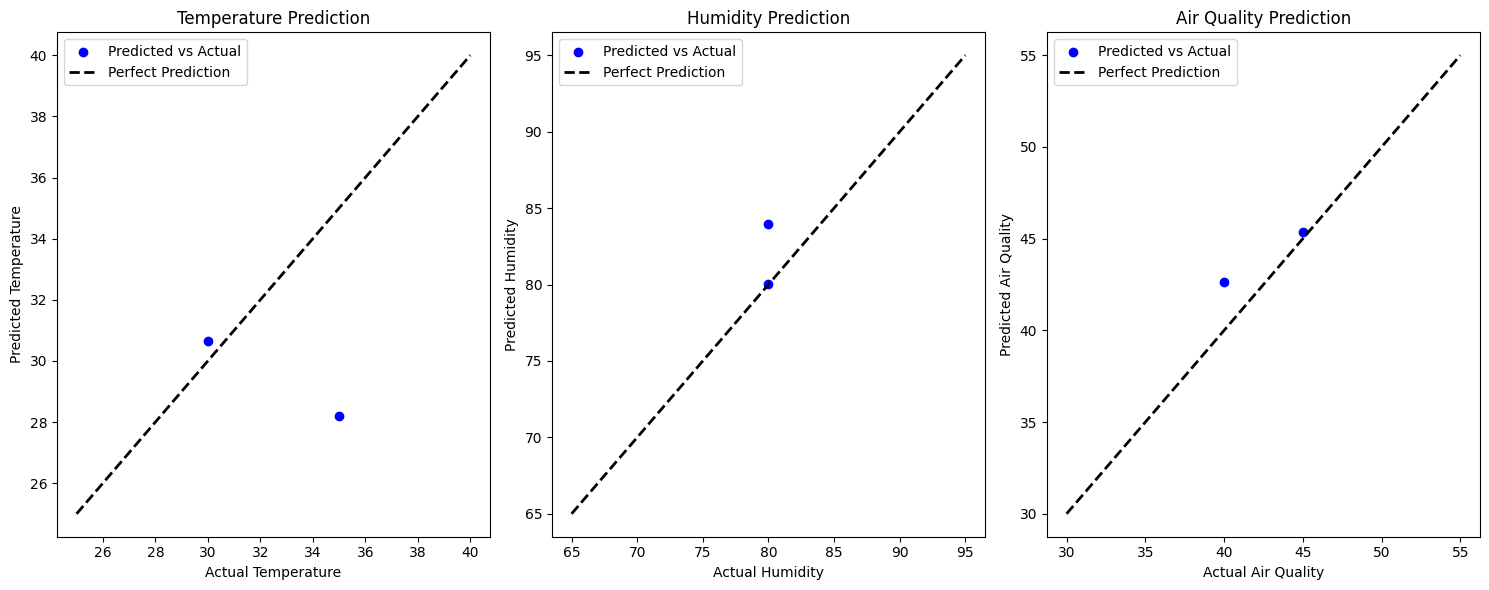

In [10]:
visual_data(res)

In [11]:
result_print(*res[0])

Predicted Temperature Range: [30.6547619  28.21428571]
Predicted Humidity Range: [80.05952381 83.92857143]
Predicted Air Quality Range: [42.61904762 45.35714286]
Predicted Temperature: 29.434523809523803
Predicted Humidity: 81.99404761904762
Predicted Humidity: 43.98809523809523


In [12]:
def vis_wether_data(data):
    # Generate line plots
    plt.figure(figsize=(12, 6))
    
    # Plot Temperature
    plt.plot(data['Temperature'], label='Temperature', marker='o')
    
    # Plot Humidity
    plt.plot(data['Humidity'], label='Humidity', marker='o')
    
    # Plot AirQuality
    plt.plot(data['AirQuality'], label='AirQuality', marker='o')
    
    
    # Adding title and labels
    plt.title('Weather Data')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()

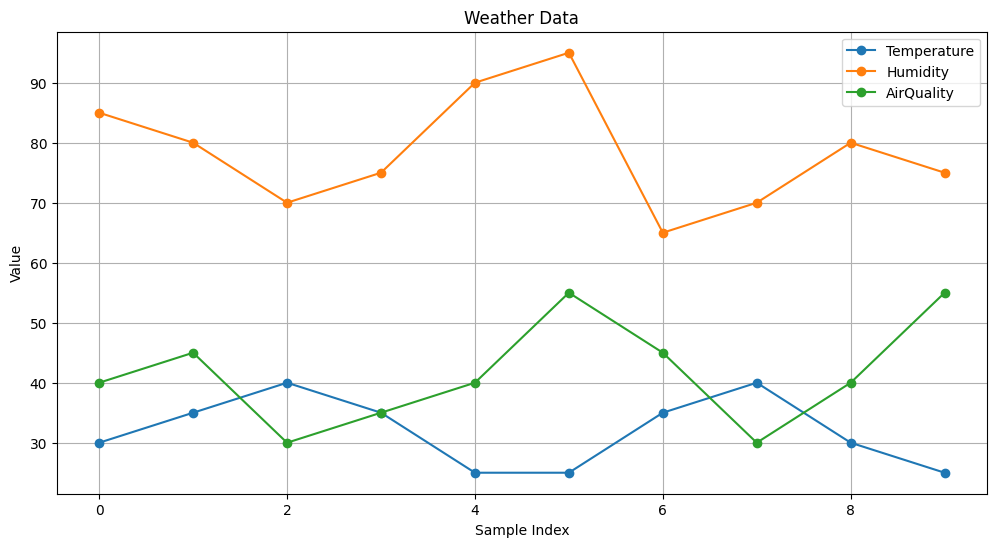

In [13]:
 vis_wether_data(data)